In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/email-spam-classification-dataset/combined_data.csv')
data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [3]:
pip install tensorflow_text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow_text as text

2024-05-13 13:33:30.302070: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 13:33:30.302181: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 13:33:30.579900: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
import tensorflow as tf
import tensorflow_hub as hub

In [6]:
tf.__version__

'2.15.0'

In [7]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)

In [8]:
preprocessor = hub.KerasLayer("https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3")

Attaching model 'tensorflow/bert/tensorflow2/en-uncased-preprocess/3' to your Kaggle notebook...


In [9]:
encoder_inputs = preprocessor(text_input)

In [10]:
!python --version

Python 3.10.13


In [11]:
encoder = hub.KerasLayer(
    "https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/bert-en-uncased-l-4-h-768-a-12/2",
    trainable=True)

Attaching model 'tensorflow/bert/tensorflow2/bert-en-uncased-l-4-h-768-a-12/2' to your Kaggle notebook...


In [12]:
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].

In [13]:
fii = tf.keras.layers.Dropout(0.2,name='dropout')(pooled_output)
fii=tf.keras.layers.Dense(64,activation='relu',name='hidden')(fii)
fii=tf.keras.layers.Dense(32,activation='relu',name='hiddenn')(fii)
fii=tf.keras.layers.Dense(8,activation='relu',name='hiddennn')(fii)
fii=tf.keras.layers.Dense(1,activation='sigmoid',name='output')(fii)

In [14]:
model=tf.keras.Model(inputs=[text_input],outputs=[fii])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.3, random_state=42)

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [18]:
model_history = model.fit(X_train, y_train, epochs=2,batch_size=200, validation_split=0.33,validation_data=(X_test,y_test), callbacks=[early_stopping])

Epoch 1/2


I0000 00:00:1715607254.899351      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


293/293 [==============================] - 1096s 4s/step - loss: 0.6759 - accuracy: 0.5352 - val_loss: 0.6647 - val_accuracy: 0.5279
Epoch 2/2
293/293 [==============================] - 1084s 4s/step - loss: 0.6640 - accuracy: 0.5224 - val_loss: 0.6655 - val_accuracy: 0.5227


In [19]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

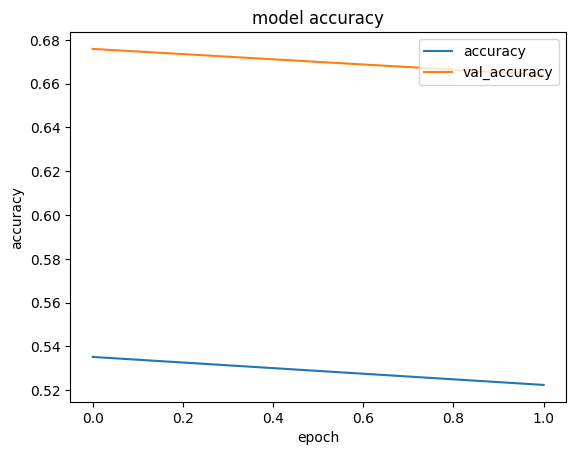

In [20]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['loss'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [21]:
y_predict=model.predict(X_test)

783/783 [==============================] - 117s 149ms/step
